# Sampling and Distributions

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Expectations and Variance

The **expectation value** of a quantity with respect to the a distribution is the weighted sum of the quantity where the weights are probabilties from the distribution. For example, for the random variable $X$:

$$E_p[X] = \sum_x x\,p(x).$$

$E_p[X]$ if often just called the expectation value of the distribution. This definition is analogous to the one for the arithmetic mean of a dataset: the only difference is that we want to give more weight to more probable values.

The variance of a distribution is defined analogous to that of a dataset:

$$V_p[X] = E_p[(X-E_p[X])^2]$$.

For the Bernoulli distribution $p(x)=p=constant$, and you are summing it over ones as opposed to 0's, so the mean is just p. The variance is $(1-p)^2\times p +(-p)^2\times (1-p) = p(1-p)(1-p+p) = p(1-p)$.

In general, we can find this mean that by obtaining a large bunch of samples from the distribution and find their arithmetic mean. The justification for this is the Law of large numbers, which we'll come to soon. 

However the intuition is obvious: for a large number of samples, the frequencies will tract probabilities well, so high probability samples with roughly the same value will re-occur, and a simple arithmetic sun will capture the curves of the distribution.

### The Law of Large Numbers

Lets keep increasing the length of the sequence of coin flips n, and compute a running average $S_n$ of the coin-flip random variables,
$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i .$$
We plot this running mean, and notice that it converges to the mean of the distribution from which the random variables are plucked, ie the Bernoulli distribution with p=0.5. 

In [2]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [3]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

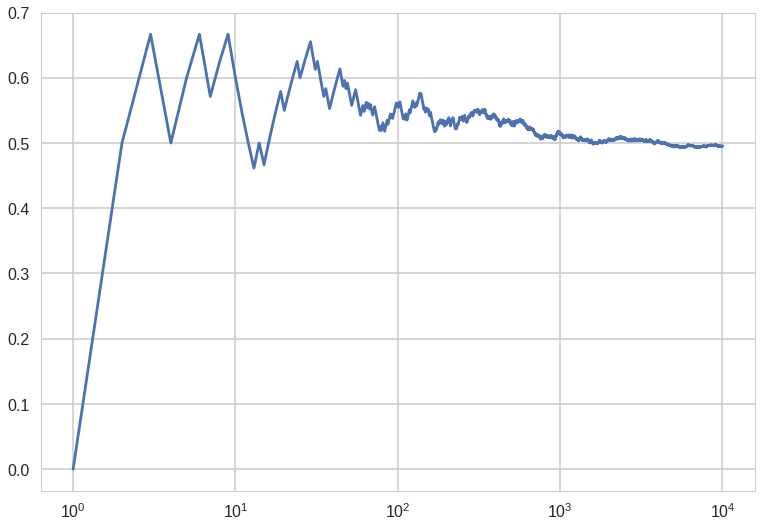

In [4]:
plt.plot(sequence_lengths, running_means);
plt.xscale('log')


This is an example of a very important theorem in statistics, the law of large numbers, which says this:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables. Suppose that $X$ has the finite mean $\mu$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to the mean of the variables $\mu$ as $n \to \infty$:**

$$ S_n \to \mu \, as \, n \to \infty. $$

The law of large numbers is what makes the **frequentist** interpretation of probability possible. For consider any event $E$ from a probability distribution with random variable Y, and consider the indicator function $I_E$ such that:

\begin{eqnarray*}
I_E(y) = 1 \,&& if \, y \in E\\
I_E(y) = 0 \,&&  otherwise
\end{eqnarray*}

The variable $Z=I_E(Y)$ is now Bernoulli random variable with parameter and thus p = P(E). Now if we take a long sequence from $Y$ and thus $Z$, then the frequency of successes (where success means being in E) will converge by the law of large numbers to the true probability p.

Having now established something about long sequences of random variables, lets turn to samples from the population of random numbers.

### Samples from a population of coin flips

Lets redo the experiment with coin flips that we started in the previous lab. We'll establish some terminology at first. What we did there was to do a large set of replications M, in each of which we did many coin flips N.  We'll call the result of each coin flip an observation, and a single replication a sample of observations. Thus the number of samples is M, and the sample size is N. These samples have been chosen from a population of size $n >> N$.

We show the mean over the observations, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [5]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [6]:
make_throws(number_of_samples=20, sample_size=10)

array([ 0.5,  0.5,  0.3,  0.5,  0.5,  0.5,  0.6,  0.5,  0.5,  0.5,  0.8,
        0.5,  0.6,  0.5,  0.3,  0.6,  0.5,  0.6,  0.6,  0.6])

Let us now do 200 replications, each of which has a sample size of 1000 flips, and store the 200 means for each sample zise from 1 to 1000 in `sample_means`.

In [7]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

Lets formalize what we are up to. Lets call the N random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean

$$\bar{x_m}(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$

Now imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population (ie the sample becomes the population). Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the law of large numbers.

Of course, if you drew many different samples of a size N (which is not infinite), the sample means $\bar{x_1}$, $\bar{x_2}$, etc would all be a bit different from each other. But the law of large numbers intuitively indicates that as the sample size gets very large and becomes an infinite population size, these slightly differeing means would all come together and converge to the population (or distribution) mean.

To see this lets define, instead, the mean or expectation of the sample means over the set of samples or replications, at a sample size N:

$$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x_m}(N) ,$$
where $\{R\}$ is the set of M replications, and calculate and plot this quantity.

In [8]:
mean_of_sample_means = [np.mean(means) for means in sample_means]


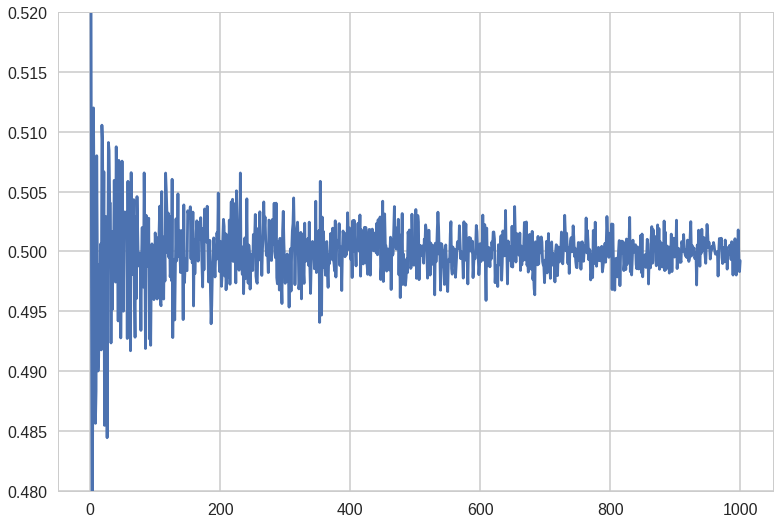

In [9]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);

Not surprisingly, the mean of the sample means converges to the distribution mean as the sample size N gets very large.


#### The notion of a Sampling Distribution

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**. 

Since, in the real world, we see only one sample, this distribution helps us do **inference**, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given, we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the **sampling distribution of the mean**, or the distribution of sample means.

We can see this mathematically by writing the mean or expectation value of the sample means thus:

$$E_{\{R\}}(N\,\bar{x}) = E_{\{R\}}(x_1 + x_2 + ... + x_N) = E_{\{R\}}(x_1) + E_{\{R\}}(x_2) + ... + E_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:

\begin{eqnarray*}
E_{\{R\}}(N\,\bar{x}) &=& N\, \mu\\
E(\bar{x}) &=& \mu
\end{eqnarray*}

which tells us that in the limit of a large number of replications the expectation value of the sampling means converges to the population mean. This limit gives us the true sampling distribution, as opposed to what we might estimate from our finite set of replicates.

#### The sampling distribution as a function of sample size

We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

In [10]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

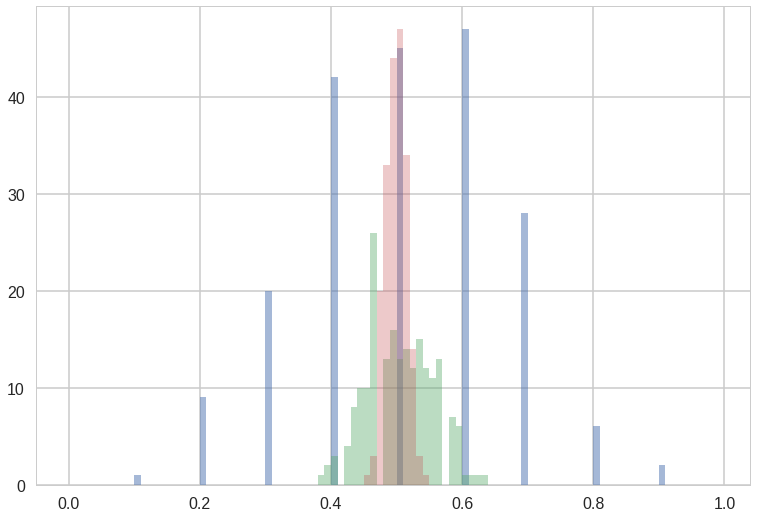

In [11]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

The distribution is much tighter at large sample sizes, and that you can have way low and way large means at small sample sizes. Indeed there are means as small as 0.1 at a sample size of 10, and as small as 0.3 at a sample size of 100. 

Lets plot the distribution of the mean as a function of sample size.

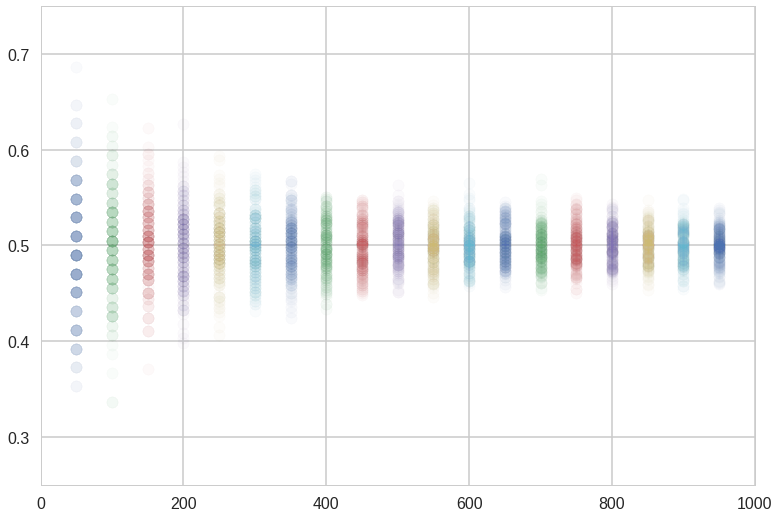

In [12]:
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

#### The kidney cancer case: higher variability at the extremes

The diagram above has a tell-tale triangular shape with high and low means, and thus much larger variability at lower sample sizes.

Consider the example of kidney cancers in various US counties from the lecture. Imagine that we have a statistical model or story for the occurence of kidney cancer. Let us think of each county as a sample in the population of kidney cancers, with the observations the per year occurence of cancer in that county. Then the low-population counties represent small size samples. The cancer rate in that county then is the sample mean of the cancer rates over multiple years in that county.

Let us plot the incidence of kidney cancer against the size of the county:
(diagram taken from http://faculty.cord.edu/andersod/MostDangerousEquation.pdf , a very worth reading aticle)

![Age adjusted cancer rates are plotted against the log of the county population](cancergraph.png)

We can see the entire pattern of low and high cancer rates in some parts of the country can entirely be explained from the smallness of the sample sizes: in a county of 1000 people, one cancer is a rate too high, for example. At the left end of the graph the cancer rate varies from 20 per 100,000 to 0. And the problem, as can be seen from the graph is onviously more acute at the upper end for the above reason. On the right side of the graph, there is very little variation, with all counties at about 5 cases per 100,000 of population.

We'd obviously like to characterize mathematically the variability in the distribution of sample means as a function of the sample size.

### The variation of the sample mean

Let the underlying distribution from which we have drawn our samples have, additionally to a well defined mean $\mu$, a well defined variance $\sigma^2$. ^[The Cauchy distribution, as you know, is a well defined exception with ill defined mean and variance].

Then, as before:

$$V_{\{R\}}(N\,\bar{x}) = V_{\{R\}}(x_1 + x_2 + ... + x_N) = V_{\{R\}}(x_1) + V_{\{R\}}(x_2) + ... + V_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the variances in the right hand side can be replaced by the population variance using the law of large numbers! Thus:

\begin{eqnarray*}
V_{\{R\}}(N\,\bar{x}) &=& N\, \sigma^2\\
V(\bar{x}) &=& \frac{\sigma^2}{N}
\end{eqnarray*}

This simple formula is called **De-Moivre's** formula, and explains the tell-tale triangular plots we saw above, with lots of variation at low sample sizes turning into a tight distribution at large sample size(N).

The square root of $V$, or the standard deviation of the sampling distribution of the mean (in other words, the distribution of sample means) is also called the **Standard Error**.

We can obtain the standard deviation of the sampling distribution of the mean at different sample sizes and plot it against the sample size, to confirm the $1/\sqrt(N)$ behaviour. 


In [20]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means]


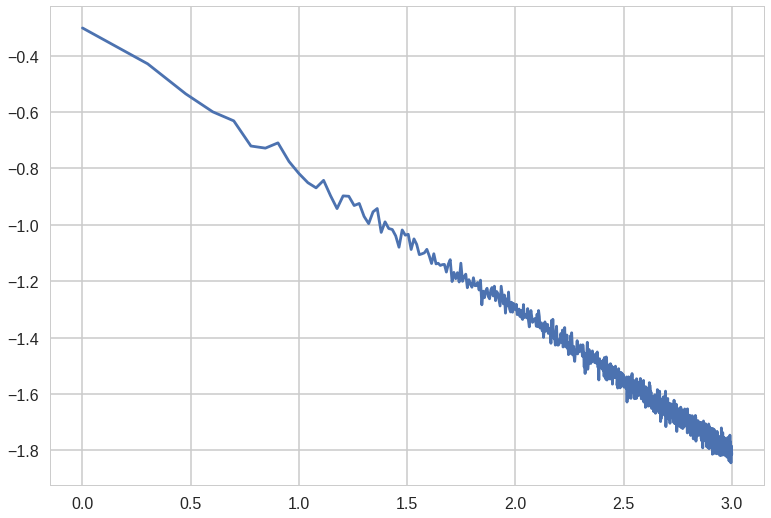

In [21]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

Let us plot again the distribution of sample means at a large sample size, $N=1000$. What distribution is this?

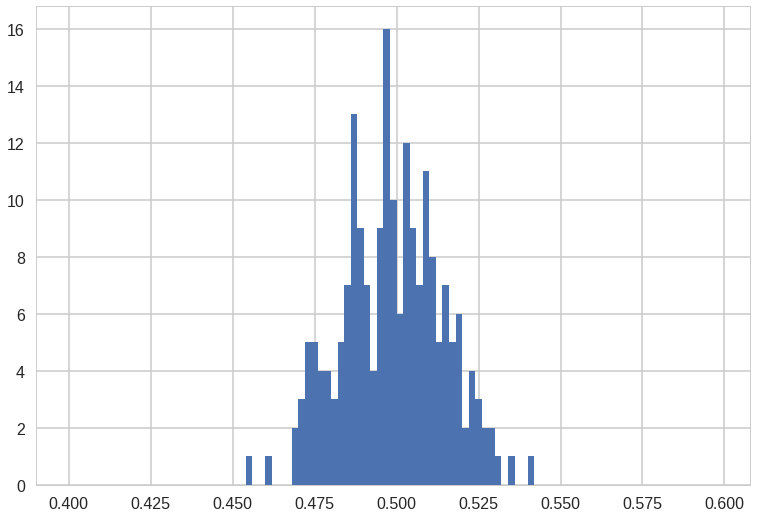

In [22]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.

### The Gaussian Distribution

We saw in the last section that the sampling distribution of the mean itself has a mean $\mu$ and variance $\frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

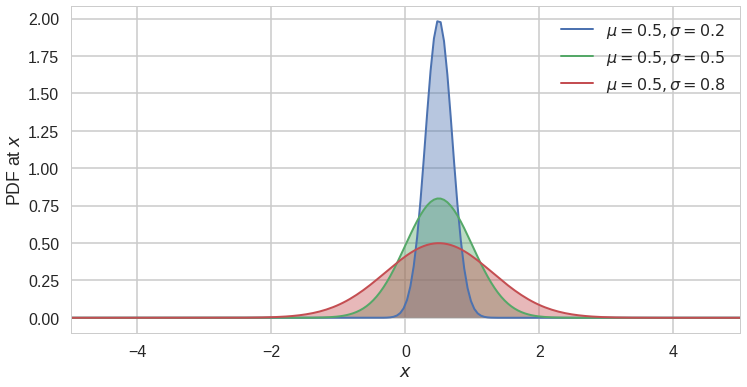

In [29]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma in zip([0.5]*3, [0.2, 0.5, 0.8]):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
              label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

### The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

Strictly speaking, under some conditions called Lyapunov conditions, the variables $x_i$ dont have to be identically distributed, as long as $\mu$ is the mean of the means and $\sigma^2$ is the sum of the individual variances. This has major consequences, for the importance of this theorem.

Many random variables can be thought of as having come from the sum of a large number of small and independent effects. For example human height or weight can be thought of as the sum as a large number of genetic and environmental factors, which add to increase or decrease height or weight respectively. Or think of a measurement of a height. There are lots of ways things could go wrong: frayed tapes, stretched tapes, smudged marks, bad lining up of the eye, etc. These are all independent and have no systematic error in one direction or the other.

Then the sum of these factors, as long as there are a large number of them, will be distributed as a gaussian.[
At this point you are probably wondering: what does this have to do with the sampling distribution of the mean? We shall come to that, but in the meanwhile, lets consider some other key applications of the CLT.]

As a rule of thumb, the CLT starts holding at $N \sim 30$.


#### An application to elections: Binomial distribution in the large n, large k limit
For example, consider the binomial distribution Binomial(n,k, p) in the limit of large n. The number of successes k in n trials can be ragarded as the sum of n IID Bernoulli variables with values 1 or 0. Obviously this is applicable to a large sequence of coin tosses, or to the binomial sampling issue that we encountered earlier in the case of the polling. 

Using the CLT we can replace the binomial distribution at large n by a gaussian where k is now a continuous variable, and whose mean is the mean of the binomial $np$ and whose variance is $np(1-p)$, since

$$S_n \sim N(p, \frac{p(1-p)}{n}).$$

The accuracy of this approximation depends on the variance. A large variance makes for a broad distribution spanning many discrete k, thus justifying the transition from a discrete to a continuous distribution.

This approximation is used a lot in studying elections. For example, suppose I told you that I'd polled 1000 people in Ohio and found that 600 would vote Democratic, and 400 republican. Imagine that this 1000 is a "sample" drawn from the voting "population" of Ohio. Assume then that these are 1000 independent bernoulli trials with p=600/1000 = 0.6. Then we can say that, from the CLT, the mean of the sampling distribution of the mean of the bernoulli or equivalently the binomial is 0.6, with a variance of $0.6*0.4/1000 = 0.00024$. Thus the standard deviation is 0.015 for a mean of 0.6, or 1.5% on a mean of 60% voting Democratic.  This 1.5% if part of what pollsters quote as the margin of error of a candidates winning; they often include other factors such as errors in polling methodology.

If one has results from multiple pollsters, one can treat them as independent samples from the voting population. Then the average from these samples will approach the average in the population, with the sample means distributed normally around it.

#### What does this all mean?

The sample mean, or mean of the random variables $x_{mi}$ in the sample $m$, has a sampling distribution with mean $\mu$ and variance $\frac{\sigma^2}{N}$, as shown before. Now for large sample sizes we can go further and use the CLT theorem to say that this distribution is the normal distribution,

$$S_N \sim N(\mu, \frac{\sigma^2}{N})$$.

The preciseness of saying that we have a gaussian is a huge gain in our expository power. For example, for the case of the weight-watchers program above, a separation of 20lbs is more than 3 standard errors away, which corresponds to being way in the tail of a gaussian distribution. Because we can now quantify the area under the curve, we can say that 99.7\% of the sample means lie within 9lbs of 150. Thus you can way easily reject the possibility that the new sample is from the weight-watchers program with 99.7\% confidence. 

Indeed, the CLT allows us to take the reduction in variance we get from large samples, and make statements in different cases that are quite strong:

1. if we know a lot about the population, and randomly sampled 100 points from it, the sample mean would be with 99.7\% confidence within $0.3\sigma$ of the population mean. And thus, if $\sigma$ is small, the sample mean is quite representative of the population mean.
2. The reverse: if we have a well sampled 100 data points, we could make strong statements about the population as a whole. This is indeed how election polling and other sampling works. (ADD MORE about what sample size is enough).
3. we can infer, as we just did, if a sample is consistent with a population
4. by the same token, you can compare two samples and infer if they are from the same population.

### The sampling distribution of the Variance

At this point you might be curious about what the sampling distribution of the variance looks like, and what can we surpise from it about the variance of the entire sample. We can do this, just like we did for the means. We'll stick with a high number of replicates and plot the mean of the sample variances as well as the truish sampling distribution of the variances at a sample size of 100.

In [ ]:
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log");

The "mean sample variance" asymptotes to the true variance of 0.25 by a sample size of 100. 

How well does the sample variance estimate the true variance? Notice that the histogram above ends at 0.25, rather than having ANY frequency at 0.25. What gives?

If $V_m$ denotes the variance of a sample, 

$$ N\,V_m = \sum_{i=1}^{N} (x_{mi} - \bar{x_m})^2 = \sum_{i=1}^{N}(x_{mi} - \mu)^2 - N\,(\bar{x_m} - \mu)^2. $$

Then
$$E_{\{R\}}(N\,V_m) = E_{\{R\}}(\sum_{i=1}^{N}(x_{mi} - \mu)^2) - E_{\{R\}}(N\,(\bar{x_m} - \mu)^2)$$
In the asymptotic limit of a very large number of replicates, we can then write
$$E(N\,V) = N\,\sigma^2 - \sigma^2, $$
and thus we have
$$E(V) = \frac{N-1}{N} \,\sigma^2$$.

In other words, the expected value of the sample variance is LESS than the actual variance. This should not be surprising: consider for example a sample of size 1 from the population. There is zero variance! More genrally, whenever you sample a population, you tend to pick the more likely members of the population, and so the variance in the sample is less than the variance in the population.

An interesting application of this idea, as Shalizi points out in http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/, is that the loss of variability due to sampling of genes is indeed the origin of genetic drift. More prosaically, the fact that the above graph of expected sample variance against sample size asymptotes to 0.25 is as $\frac{N-1}{N}$ if very close to 1 at large N. 

Or put another way, you ought to correct your sample variances by a factor of $\frac{n}{n-1}$ to estimate the population variance, which itself works as the sampling distribution of the sample variance is rather tight, as seen below.

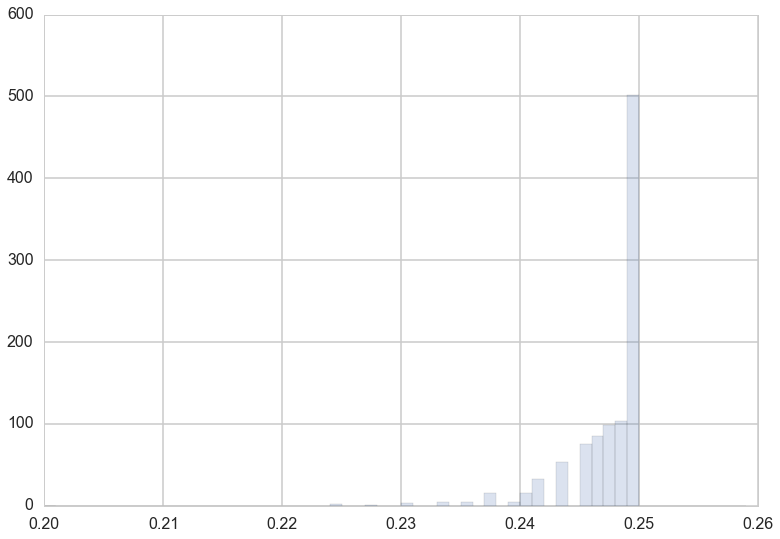

In [39]:
plt.hist(sample_vars_1000_replicates[99], bins=np.arange(0.2,0.26,0.001), alpha=0.2, normed=True);

### An application: Gallup Party Affiliation Poll

Earlier we had used the Predictwise probabilities from Octover 12th to create a predictive model for the elections. This time we will try to **estimate** our own win probabilities to plug into our predictive model.

We will start with a simple forecast model. We will try to predict the outcome of the election based the estimated proportion of people in each state who identify with one one political party or the other.

Gallup measures the political leaning of each state, based on asking random people which party they identify or affiliate with. [Here's the data](http://www.gallup.com/poll/156437/heavily-democratic-states-concentrated-east.aspx#2) they collected from January-June of 2012:

In [ ]:
gallup_2012=pd.read_csv("g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican
gallup_2012.head()

Each row lists a state, the percent of surveyed individuals who identify as Democrat/Republican, the percent whose identification is unknown or who haven't made an affiliation yet, the margin between Democrats and Republicans (`Dem_Adv`: the percentage identifying as Democrats minus the percentage identifying as Republicans), and the number `N` of people surveyed.

The most obvious source of error in the Gallup data is the finite sample size -- Gallup did not poll *everybody* in America, and thus the party affilitions are subject to sampling errors. How much uncertainty does this introduce? Lets estimate the sampling error using what we learnt in the last section

In [27]:
gallup_2012["SE_percentage"]=100.0*np.sqrt((gallup_2012.Democrat/100.)*((100. - gallup_2012.Democrat)/100.)/(gallup_2012.N -1))
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown,SE_percentage
State,,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4,0.849059
Alaska,35.9,44.3,-8.4,402,19.8,2.395543
Arizona,39.8,47.3,-7.5,4325,12.9,0.744384
Arkansas,41.5,40.8,0.7,2071,17.7,1.082971
California,48.3,34.6,13.7,16197,17.1,0.392658


On their [webpage](http://www.gallup.com/poll/156437/heavily-democratic-states-concentrated-east.aspx#2) discussing these data, Gallup notes that the sampling error for the states is between 3 and 6%, with it being 3% for most states. This is more than what we find, so lets go with what Gallup says.

We now use Gallup's estimate of 3% to build a Gallup model with some uncertainty. We will, using the CLT, assume that the sampling distribution of the Obama win percentage is a gaussian with mean the democrat percentage and standard error the sampling error of 3\%. 

We'll build the model in the function `uncertain_gallup_model`, and return a forecast where the probability of an Obama victory is given by the probability that a sample from the `Dem_Adv` Gaussian is positive.

To do this we simply need to find the area under the curve of a Gaussian that is on the positive side of the x-axis.
The probability that a sample from a Gaussian with mean $\mu$ and standard deviation $\sigma$ exceeds a threhold $z$ can be found using the the Cumulative Distribution Function of a Gaussian:

$$
CDF(z) = \frac1{2}\left(1 + {\mathrm erf}\left(\frac{z - \mu}{\sqrt{2 \sigma^2}}\right)\right) 
$$

In [28]:
from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3
    prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

In [30]:
model = uncertain_gallup_model(gallup_2012)
model = model.join(predictwise.Votes)

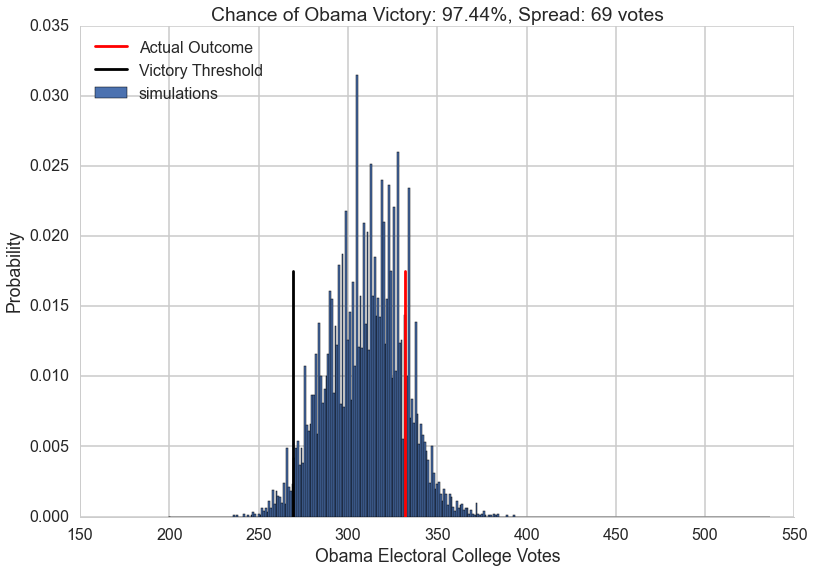

In [36]:
prediction = simulate_election(model, 10000)
plot_simulation(prediction)

The predictive distribution is consistent with the real data -- the real outcome seems like a typical outcome according to the model. The accuracy is not very good as the center of the distribution falls fairly far from the observed outcome, but the precision is only marginally worse than in the predictwise case.

But note that we used the Gallup voter self-identification from January to June to predict this, so we do not expect to do too well. And even though this is probably not a very unbiased sample, it still makes us wonder: at 97\% of simulations showing a win for Obama, why did Romney ever think he had a chance?